In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## EXPLORACION DEL DATASET

In [2]:
column_names=['Target','Alcohol','Malic_Acid','Ash','Alcalinity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols',
           'Proanthocyanins','Color_Intensity','Hue','OD280/OD315','Proline']

In [3]:
Wine=pd.read_csv('wineData.txt', sep=',',names=column_names)

In [4]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity            178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
Wine.head()

,Target,Alcohol,Malic_Acid,Ash,Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity            178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
Wine.describe()

,Target,Alcohol,Malic_Acid,Ash,Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
Wine.Target.value_counts()

2    71
1    59
3    48
Name: Target, dtype: int64

In [9]:
Wine.isna().sum()

Target                  0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity              0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [10]:
Wine.isnull().sum()

Target                  0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity              0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

Este dataset contiene los resultados del análisis químico de vinos provenientes de la misma región de Italia producidos en tres bódegas diferentes.   

El dataset tiene 178 registros y está conformado por las mediciones de 13 componentes que están en los tres tipos de vinos, que conforman el grupo de variables independientes. Todas las variables son numéricas contínuas de tipo int64 o float64.  

La variable target o dependiente categórica (1,2,3) representa la pertenencia del vino a una bodega o otra.  

Hay:  
59 muestras para el primer vino  
71 muestras para el segundo vino  
48 muestras para el tercer vino    



### Estudio de la distribución de las variables

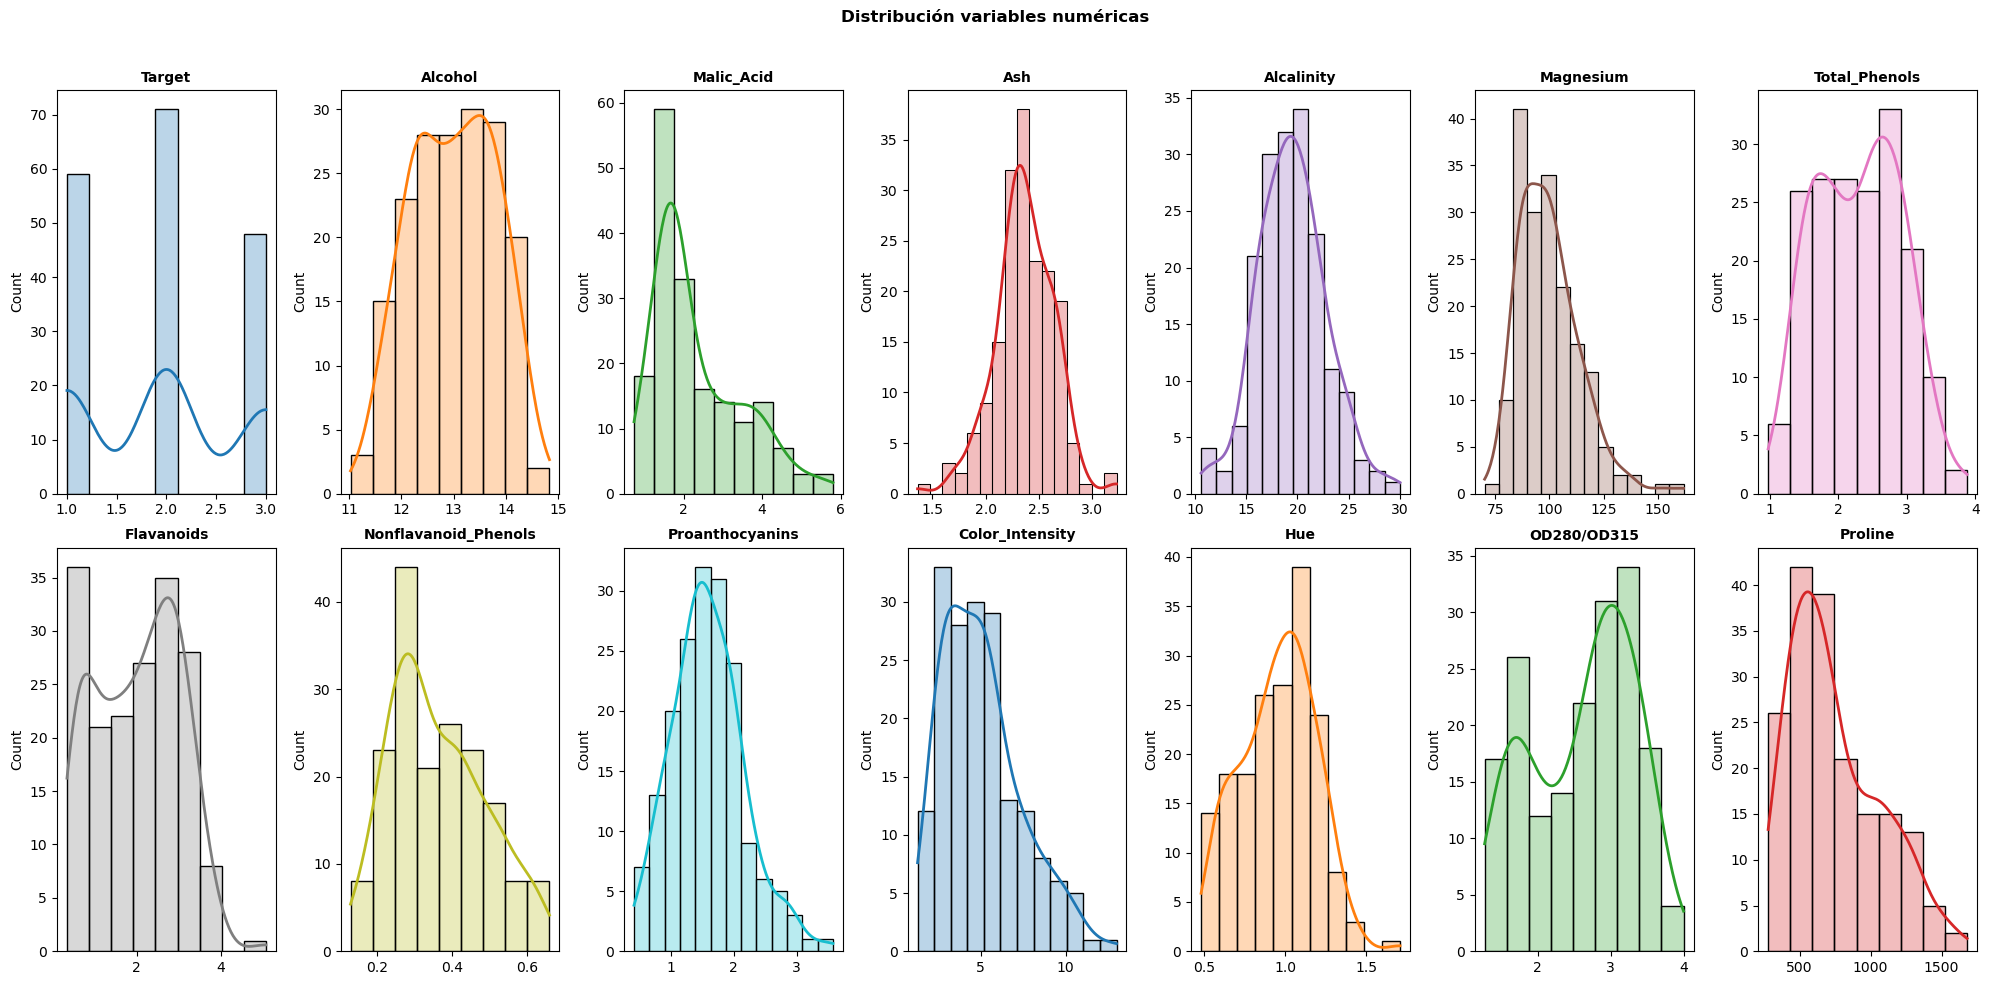

In [11]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
axes = axes.flat
columnas_numeric = Wine.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    =Wine,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold");

#### TEST DE SHAPIRO WILK
H0 : la variable está normalmente distribuida  
H1 : la variable no está normalmente distribuida

In [12]:
Wine.columns

Index(['Target', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [13]:
list_Wine=[Wine.Alcohol,Wine.Malic_Acid,Wine.Ash, Wine.Alcalinity, Wine.Magnesium,
        Wine.Total_Phenols, Wine.Flavanoids, Wine.Nonflavanoid_Phenols,
       Wine.Proanthocyanins, Wine.Color_Intensity, Wine.Hue, Wine['OD280/OD315'], Wine.Proline]


In [14]:
from scipy.stats import shapiro
for x in list_Wine:
    stat, p = shapiro(x)
    print('p_value ',x.name,p)

p_value  Alcohol 0.020050711929798126
p_value  Malic_Acid 2.94582247484243e-10
p_value  Ash 0.038691021502017975
p_value  Alcalinity 0.26394858956336975
p_value  Magnesium 6.345416068143095e-07
p_value  Total_Phenols 0.0043947165831923485
p_value  Flavanoids 1.6790636436780915e-05
p_value  Nonflavanoid_Phenols 0.00010552681487752125
p_value  Proanthocyanins 0.01445252075791359
p_value  Color_Intensity 9.230111004399078e-07
p_value  Hue 0.01742566004395485
p_value  OD280/OD315 2.315865231139469e-06
p_value  Proline 1.7412214958767436e-07


De todas las variables, solo Alcalinity tiene un p_value superior al 5%, así que debemos rechazar que las otras variables presenten una distribución Gaussiana.   

Este dato se tendrá en cuenta en el pre-processing que realizaremos más adelante en el ejercicio.

### Estudio de la correlación de las variables

<AxesSubplot:>

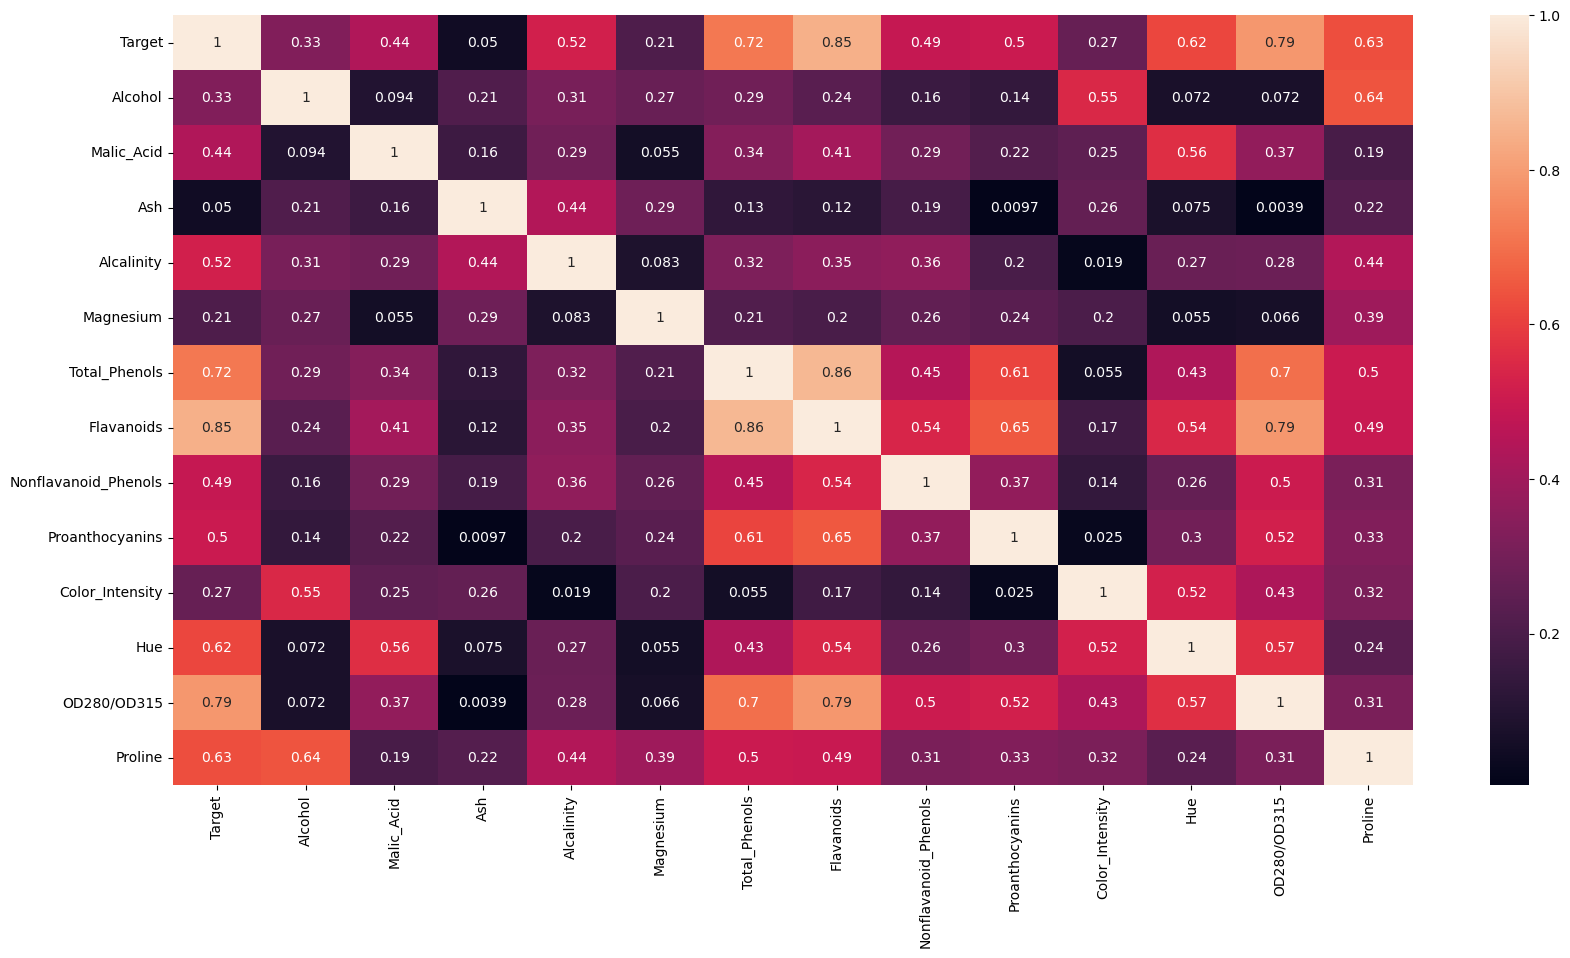

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(Wine.corr().abs(),  annot=True)

En esta matriz podemos observar que las siguientes 5 variables tienen una correlación relevante con la variable Target, superior a 0,6: 

Total Phenols, Flavanoids, Hue, OD280/OD315,Proline

Valoraremos más adelante la relevancia de cada una de estas variables en los modelos de predicción.


### Distribución de las variables en función del target

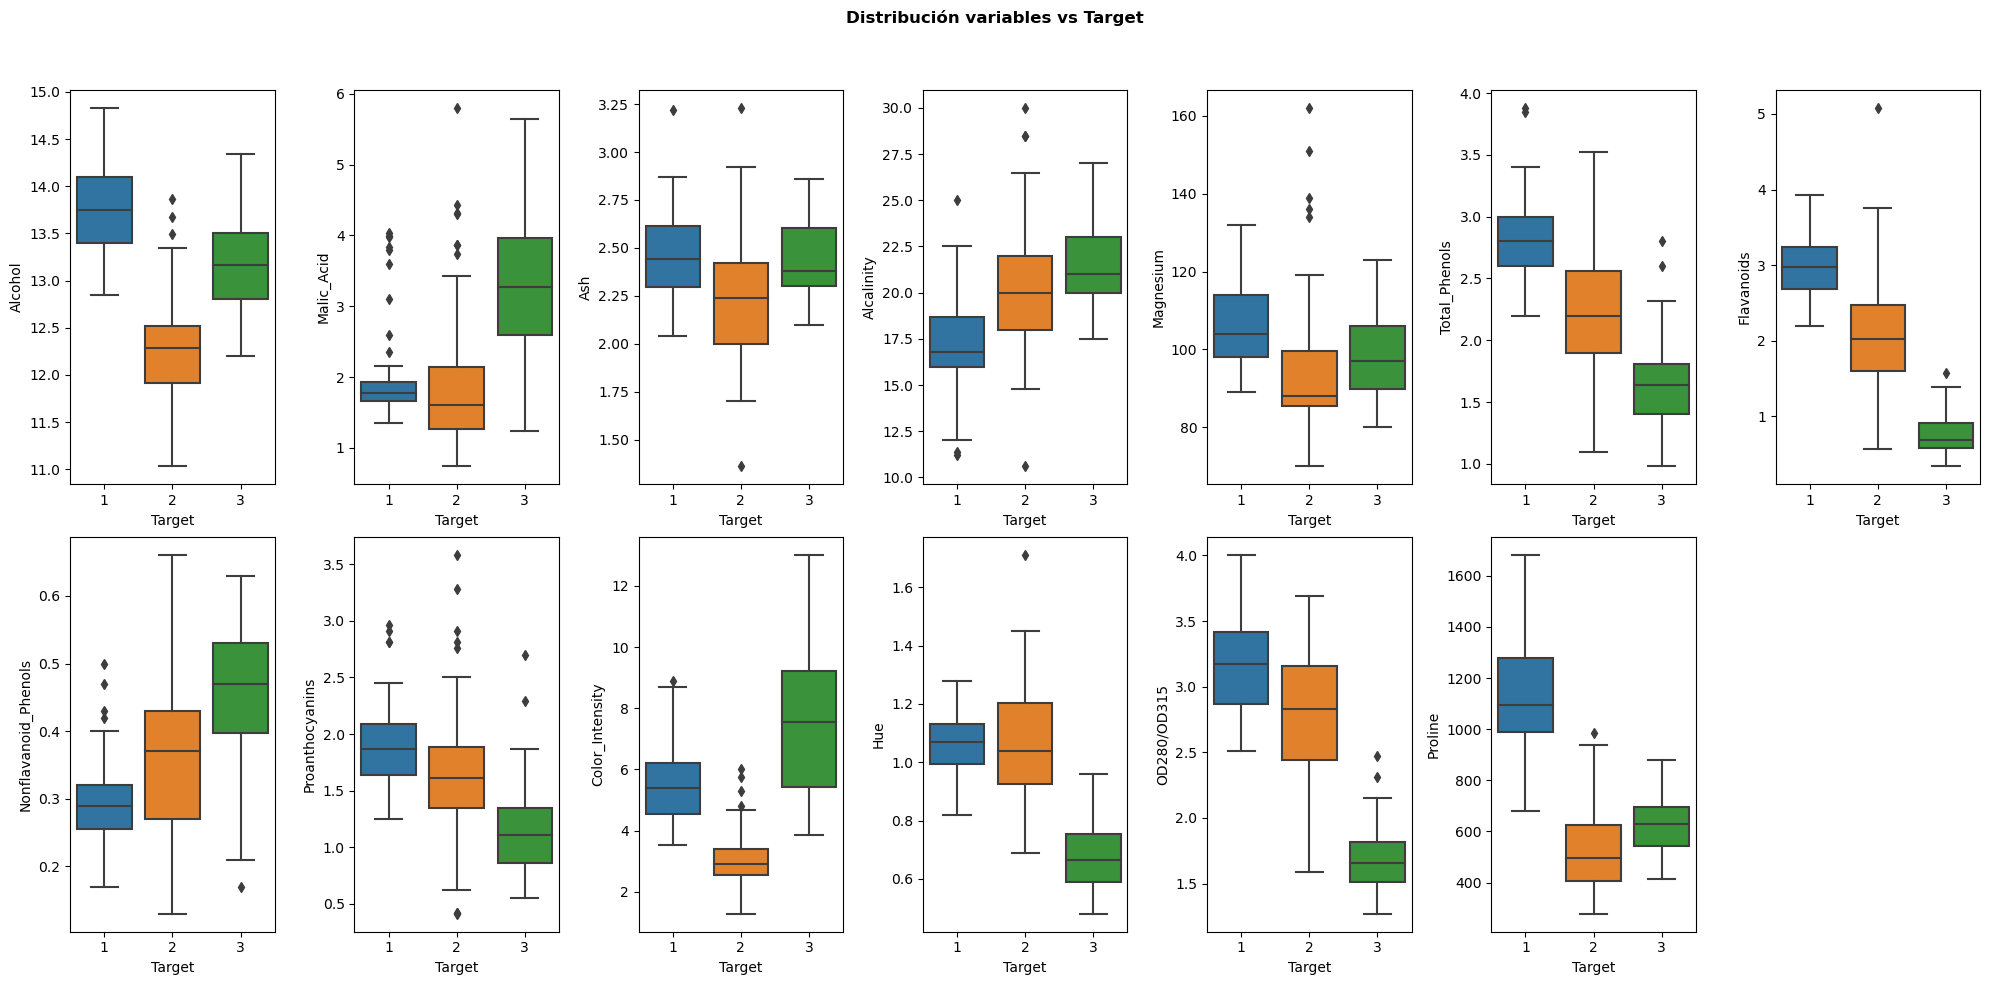

In [16]:

# Gráfico de distribución de las variables con respecto a TARGET

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
axes = axes.flat
columnas_numeric = Wine.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('Target')

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        x           = Wine['Target'],
        y           = Wine[colum],
        #color       = "gray",
        #marker      = '.',
        #scatter_kws = {"alpha":0.4},
        #line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    #axes[i].set_title(f"Target vs {colum}", fontsize = 11, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    #axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    #axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    #axes[i].tick_params(labelsize = 8)
    #axes[i].set_xlabel("")
   # axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [13]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables vs Target', fontsize = 12, fontweight = "bold");

Esta gráfica nos permite identificar que en su conjunto las variables independientes presentan una distribución con parámetros muy diferenciables en función del target, lo cual nos permite anticipar que los modelos de previsión que vayamos a elaborar en base a estas variables deberían tener unos ratios de éxito elevados.

In [17]:
Wine.groupby(['Target']).mean()

,Alcohol,Malic_Acid,Ash,Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
Target,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


Efectivamente, en general las medias por categoría son diferentes.

## EXERCICI 1 

## División Train Test

In [18]:
Wine_tt=Wine.copy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
                                        Wine_tt.drop('Target', axis = 'columns'),
                                        Wine_tt['Target'],
                                        train_size   = 0.7,
                                        random_state = 1,
                                        )

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


Implementamos 4 modelos de clasificación : Decision Tree Classifier, K Nearest Neighbors, Suport Vector Machine y XGBoost.

## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

Creamos el modelo:

In [22]:
Wine_dtc=DecisionTreeClassifier()

Entrenamos el modelo:

In [23]:
Wine_dtc.fit(X_train,y_train)

DecisionTreeClassifier()

Realizamos la predicción en base a X_test:

In [24]:
y_pred=Wine_dtc.predict(X_test)
y_pred

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

In [28]:
Wine_dtc.get_depth()

6

In [29]:
Wine_dtc.get_n_leaves()

8

In [30]:
Wine_dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
Wine_dtc.feature_importances_

array([0.09209357, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37183384, 0.        , 0.        , 0.        ,
       0.02364799, 0.1055714 , 0.40685321])

El modelo es un arbol de profundidad 6, que consta de 8 hojas, que incorpora 5 variables en su recorrido siendo las 3 más importantes Proline, Flavanoids y OD280/OD315, todas presentando una alta correlación con el target como vimos anteriormente.

In [32]:
import pydotplus
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(Wine_dtc)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [33]:
from IPython.display import Image

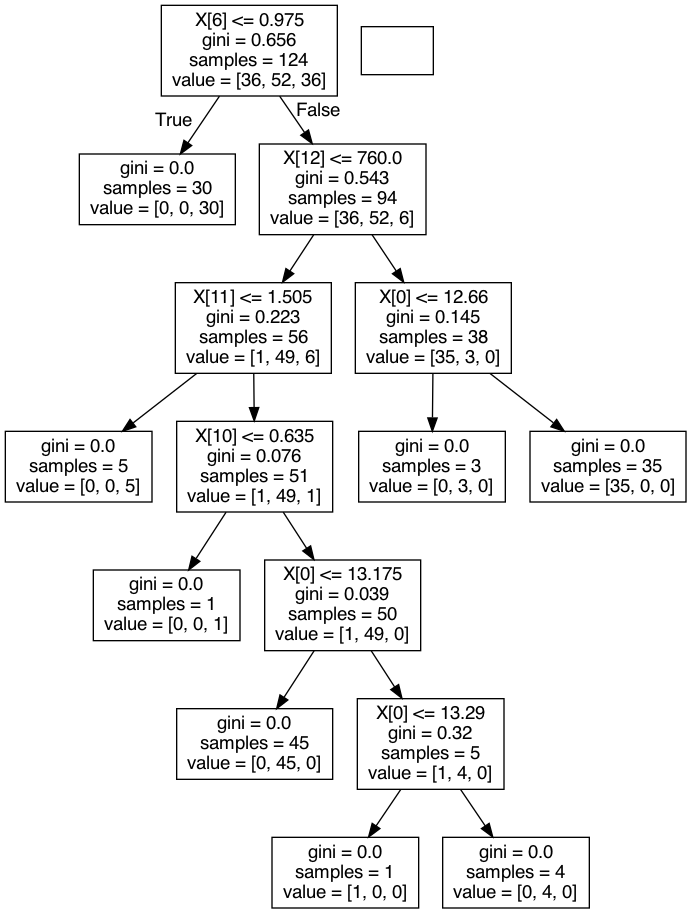

In [34]:
Image('tree.png')

## Evaluación

In [35]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred))

[[22  1  0]
 [ 1 17  1]
 [ 0  0 12]]


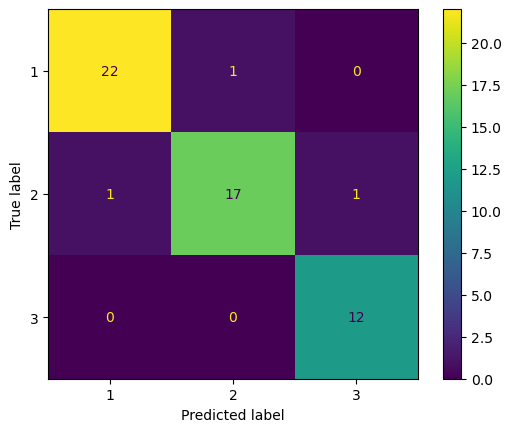

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay  
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=Wine_dtc.classes_)
display_cm.plot()




In [37]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test,y_pred),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test,y_pred,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test,y_pred,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test,y_pred,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test,y_pred,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test,y_pred,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test,y_pred,average='weighted').round(2))

Accuracy 0.94
Precisión [0.96 0.94 0.92]
Precisión(weighted) 0.94
Recall [0.96 0.89 1.  ]
Recall(weighted) 0.94
F1 [0.96 0.92 0.96]
F1(weighted) 0.94


En base a los resultados obtenidos, podemos constatar que el modelo presenta resultados muy altos :  

Exactitud : 94%, 51 aciertos de 54 casos examinados  

Precisión :  
    96% para categoría 1 (22 aciertos de 23 estimados)   
    94% para categoría 2 (17 aciertos de 18 estimados)  
    92% para categoría 3 (12 aciertos de 13 estimados)  
    
Sensibilidad :  
    96% para categoría 1 (22 aciertos de 23 positivos)  
    89% para categoría 2 (17 aciertos de 19 positivos)  
    100% para categoría 3(12 aciertos de 12 positivos)  

Y finalmente el score f1 que combina las métricas anteriores :  
    96% para categoría 1  
    92% para categoría 2  
    96% para categoría 3  


## K-nearest Neighbors(KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier


Creamos el modelo:

In [39]:
Wine_knn=KNeighborsClassifier()

Entrenamos el modelo:

In [40]:
Wine_knn.fit(X_train,y_train)

KNeighborsClassifier()

Realizamos la predicción en base a X_test:

In [41]:
y_pred_knn=Wine_knn.predict(X_test)
y_pred_knn


array([2, 2, 3, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 1])

In [42]:
Wine_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Evaluación

In [43]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_knn))

[[21  0  2]
 [ 2 12  5]
 [ 0  7  5]]


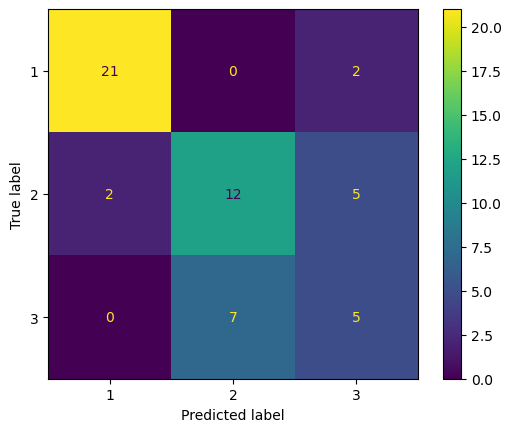

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay  
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_knn)
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=Wine_dtc.classes_)
display_cm.plot()




In [45]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test,y_pred_knn),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test,y_pred_knn,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test,y_pred_knn,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test,y_pred_knn,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test,y_pred_knn,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test,y_pred_knn,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test,y_pred_knn,average='weighted').round(2))

Accuracy 0.7
Precisión [0.91 0.63 0.42]
Precisión(weighted) 0.7
Recall [0.91 0.63 0.42]
Recall(weighted) 0.7
F1 [0.91 0.63 0.42]
F1(weighted) 0.7


## SVM

In [46]:
from sklearn import svm


Creamos el modelo:

In [47]:
Wine_svm=svm.SVC(kernel='linear')

Entrenamos el modelo:

In [48]:
Wine_svm.fit(X_train,y_train)

SVC(kernel='linear')

Realizamos la predicción en base a X_test:

In [49]:
y_pred_svm=Wine_svm.predict(X_test)
y_pred_svm


array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

In [51]:
Wine_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Evaluación

In [52]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_svm))

[[23  0  0]
 [ 1 18  0]
 [ 0  1 11]]


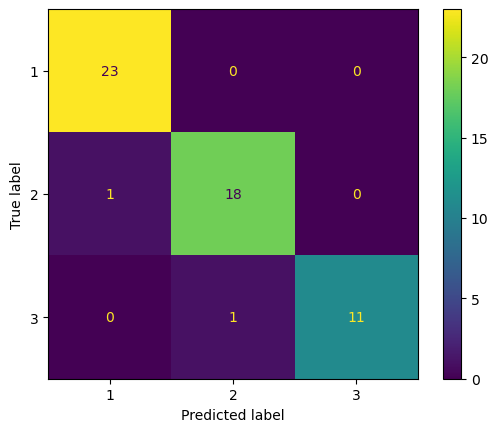

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay  
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_svm)
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=Wine_dtc.classes_)
display_cm.plot()




In [54]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test,y_pred_svm),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test,y_pred_svm,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test,y_pred_svm,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test,y_pred_svm,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test,y_pred_svm,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test,y_pred_svm,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test,y_pred_svm,average='weighted').round(2))

Accuracy 0.96
Precisión [0.96 0.95 1.  ]
Precisión(weighted) 0.96
Recall [1.   0.95 0.92]
Recall(weighted) 0.96
F1 [0.98 0.95 0.96]
F1(weighted) 0.96


## XGBoost 

In [55]:
import xgboost as xgb

Creamos el modelo:

In [56]:
Wine_xgb = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

Entrenamos el modelo:

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb=le.fit_transform(y_test)

In [58]:
y_train_xgb,y_test_xgb

(array([1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
        1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
        1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
        1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
        2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0]),
 array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
        2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
        0, 0, 1, 0, 0, 0, 1, 2, 2, 0]))

In [59]:
Wine_xgb.fit(X_train,y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Realizamos la predicción en base a X_test:

In [60]:
y_pred_xgb = Wine_xgb.predict(X_test)

In [61]:
y_pred_xgb

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

In [62]:
comparar_xgb=pd.DataFrame(y_test_xgb)

In [63]:
comparar_xgb['Target_predict']=Wine_xgb.predict(X_test)

In [64]:
comparar_xgb.rename(
    columns={0:'Target'},inplace=True)

In [65]:
comparar_xgb

,Target,Target_predict
0,2,2
1,1,1
2,0,0
3,1,1
4,0,0
5,2,2
6,1,1
7,0,0
8,2,2
9,1,1


In [66]:
Wine_xgb.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Evaluación

In [67]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test_xgb,y_pred_xgb))

[[23  0  0]
 [ 2 17  0]
 [ 0  0 12]]


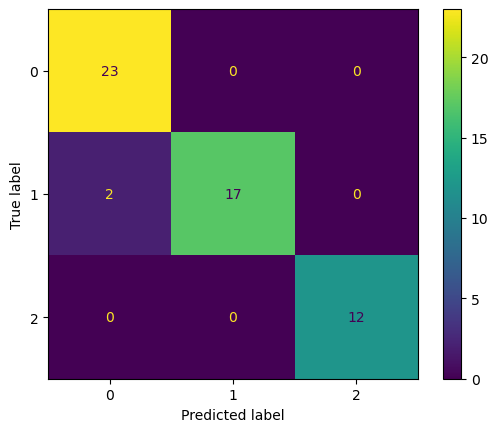

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay  
confusion_matrix = metrics.confusion_matrix(y_test_xgb,y_pred_xgb)
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=Wine_xgb.classes_)
display_cm.plot()




In [69]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test_xgb,y_pred_xgb),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test_xgb,y_pred_xgb,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test_xgb,y_pred_xgb,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test_xgb,y_pred_xgb,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test_xgb,y_pred_xgb,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test_xgb,y_pred_xgb,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test_xgb,y_pred_xgb,average='weighted').round(2))

Accuracy 0.96
Precisión [0.92 1.   1.  ]
Precisión(weighted) 0.97
Recall [1.   0.89 1.  ]
Recall(weighted) 0.96
F1 [0.96 0.94 1.  ]
F1(weighted) 0.96


## EXERCICI 2

Los modelos presentan todos un alto grado de éxito, como bien veníamos observando, las variables independientes permiten determinar de forma muy precisa la pertencia de un vino a una categoría o otra.

Vamos a comparar los resultados obtenidos en cada caso en base a las métricas ponderadas :

In [71]:
Results=pd.DataFrame(
{'Decision Tree' : [round(metrics.accuracy_score(y_test,y_pred),2),metrics.precision_score(y_test,y_pred,average='weighted').round(2),metrics.recall_score(y_test,y_pred,average='weighted').round(2) ,metrics.f1_score(y_test,y_pred,average='weighted').round(2)],
'KNN' : [round(metrics.accuracy_score(y_test,y_pred_knn),2),metrics.precision_score(y_test,y_pred_knn,average='weighted').round(2),metrics.recall_score(y_test,y_pred_knn,average='weighted').round(2) ,metrics.f1_score(y_test,y_pred_knn,average='weighted').round(2)],
'SVM' : [round(metrics.accuracy_score(y_test,y_pred_svm),2),metrics.precision_score(y_test,y_pred_svm,average='weighted').round(2),metrics.recall_score(y_test,y_pred_svm,average='weighted').round(2) ,metrics.f1_score(y_test,y_pred_svm,average='weighted').round(2)],
'XGBoost' :[round(metrics.accuracy_score(y_test_xgb,y_pred_xgb),2),metrics.precision_score(y_test_xgb,y_pred_xgb,average='weighted').round(2),metrics.recall_score(y_test_xgb,y_pred_xgb,average='weighted').round(2) ,metrics.f1_score(y_test_xgb,y_pred_xgb,average='weighted').round(2)]},
index = ['Accuracy', 'Precisión', 'Recall','F1'])
Results

,Decision Tree,KNN,SVM,XGBoost
Accuracy,0.94,0.7,0.96,0.96
Precisión,0.94,0.7,0.96,0.97
Recall,0.94,0.7,0.96,0.96
F1,0.94,0.7,0.96,0.96


Los resultados son muy altos y similares para los 3 modelos Decision Tree, KNN y XGBoost, siendo el peor el modelo K-nearest neighbors.  

Valoraremos más adelante en que medida puede ser mejorado.

## EXERCICI 3

Creamos una copia del dataset, necesitaremos procesar todo el dataset para realizar la búsqueda de hyperparámetros que puedan mejorar los modelos:

In [72]:
X=Wine.copy()
X.head()

,Target,Alcohol,Malic_Acid,Ash,Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [73]:
X.drop(['Target'],axis=1,inplace=True)

In [76]:
y=pd.DataFrame(Wine['Target'])

In [75]:
print(X.shape)
print(y.shape)

(178, 13)
(178, 1)


Los resultados obtenidos en el ejercicio anterior nos hacen pensar que los modelos dificilmente pueden ser mejorados, exceptuando el modelo KNN.  
No obstante, haremos con Gridsearch la búsqueda de parámetros que puedan eventualmente mejorar los modelos.

## Decision Tree Classifier

In [77]:
Wine_dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## GridsearchCV

In [78]:
parameters={'criterion':['gini','entropy','log_loss'],'max_depth':[1,2,3,4,5,6,7,8,9,10,None],'max_features':[1,2,3,4,5,6,7,8,9,10,11,12,13,None],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,20,30,40,None],
           'splitter':['best','random']}
grid_dtc = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters)
grid_dtc.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                            30, 40, None],
                         'splitter': ['best', 'random']})

In [79]:
grid_dtc.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 7,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Aplicamos los parámetros sugeridos por GridsearchCV : profundidad máxima 4, máximo de variables empleadas 7, máximo de hojas node 6.

In [80]:
Wine_dtc_params=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=7,max_leaf_nodes=6)

In [82]:
Wine_dtc_params.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       max_leaf_nodes=6)

In [83]:
y_pred_dtc_params=Wine_dtc_params.predict(X_test)
y_pred_dtc_params

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

In [84]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_dtc_params))

[[23  0  0]
 [ 1 18  0]
 [ 0  1 11]]


In [85]:
Wine_dtc_params.get_depth()

3

In [86]:
Wine_dtc_params.get_n_leaves()

6

In [87]:
Wine_dtc_params.feature_importances_

array([0.27701089, 0.        , 0.        , 0.03207117, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15904533,
       0.        , 0.4128773 , 0.11899531])

In [88]:
import pydotplus
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(Wine_dtc_params)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_params.png')

True

In [89]:
from IPython.display import Image

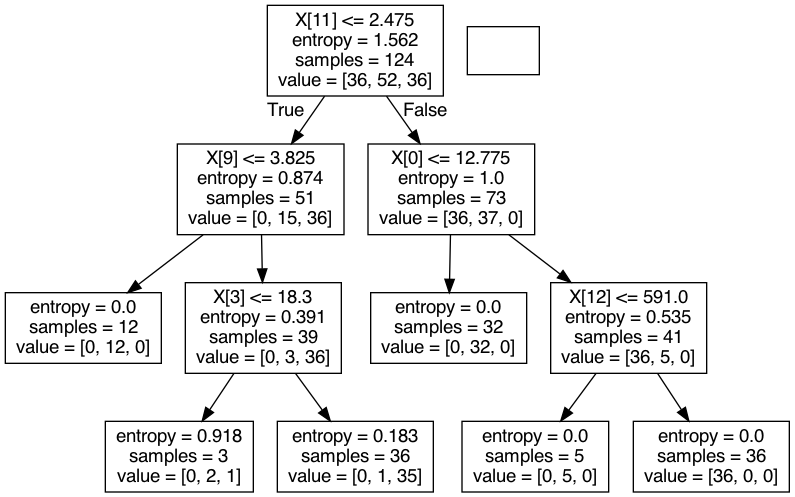

In [90]:
Image('tree_params.png')

In [93]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test,y_pred_dtc_params),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test,y_pred_dtc_params,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test,y_pred_dtc_params,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test,y_pred_dtc_params,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test,y_pred_dtc_params,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test,y_pred_dtc_params,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test,y_pred_dtc_params,average='weighted').round(2))

Accuracy 0.96
Precisión [0.96 0.95 1.  ]
Precisión(weighted) 0.96
Recall [1.   0.95 0.92]
Recall(weighted) 0.96
F1 [0.98 0.95 0.96]
F1(weighted) 0.96


El modelos ha mejorado 2 centésimas en general, en cuanto a exactitud, 52 aciertos de 54 casos (un acierto adicional).

## GridsearchCV (alpha)

In [94]:
path=DecisionTreeClassifier().cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha')

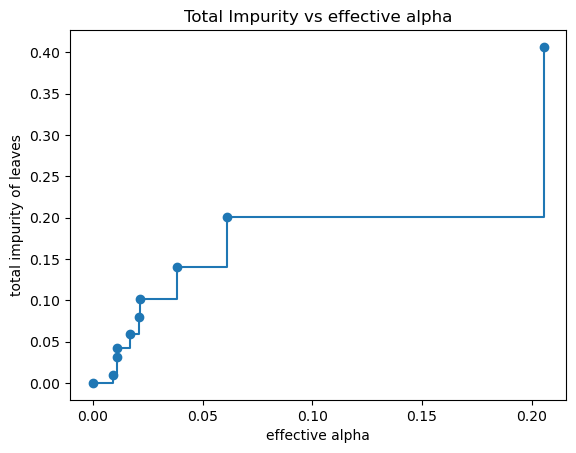

In [95]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha")

In [96]:
dtcs = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtc.fit(X, y)
    dtcs.append(dtc)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dtcs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2517854009364391


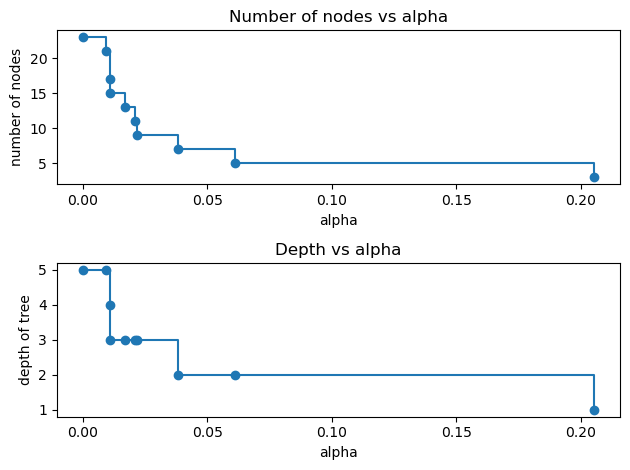

In [97]:
dtcs = dtcs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtc.tree_.node_count for dtc in dtcs]
depth = [dtc.tree_.max_depth for dtc in dtcs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

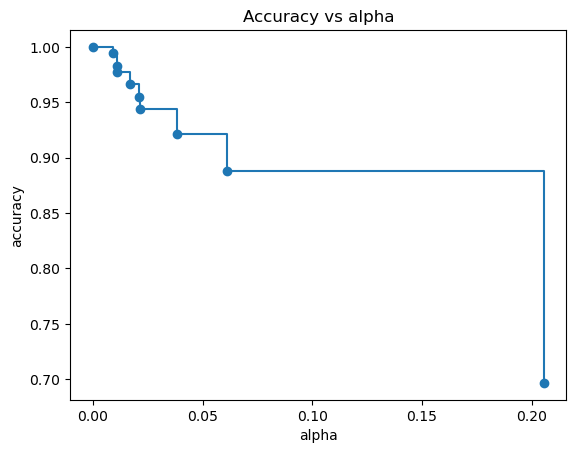

In [98]:
scores = [dtc.score(X, y) for dtc in dtcs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha")
ax.plot(ccp_alphas,scores, marker="o", drawstyle="steps-post")

plt.show()

Observamos que el valor alpha que optimiza los resultados es 0, el cual es el valor incorporado en el modelo por defecto.

## KNN 

In [99]:
Wine_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## GridsearchCV 

In [100]:
k_range=list(range(1,20))

In [101]:
parameters_knn={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors': k_range,'weights': ['uniform', 'distance',]}

In [102]:
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters_knn)
grid_knn.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [103]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

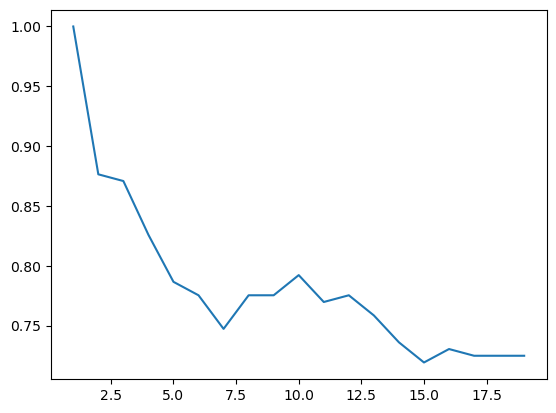

In [104]:
k_range = list(range(1, 20))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X,y))
plt.plot(k_range, scores)
plt.show()

La cantidad de vecinos por defecto incoporados en el modelo es 5, GridsearchCV determinada que la cantidad óptima es 1.

In [105]:
Wine_knn_params=KNeighborsClassifier(n_neighbors=1)

In [106]:
Wine_knn_params.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [107]:
y_pred_knn_params=Wine_knn_params.predict(X_test)
y_pred_knn_params

array([3, 2, 3, 3, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2, 2, 3, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 3, 1])

In [108]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_knn_params))

[[21  1  1]
 [ 1 14  4]
 [ 0  7  5]]


In [109]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test,y_pred_knn_params),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test,y_pred_knn_params,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test,y_pred_knn_params,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test,y_pred_knn_params,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test,y_pred_knn_params,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test,y_pred_knn_params,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test,y_pred_knn_params,average='weighted').round(2))

Accuracy 0.74
Precisión [0.95 0.64 0.5 ]
Precisión(weighted) 0.74
Recall [0.91 0.74 0.42]
Recall(weighted) 0.74
F1 [0.93 0.68 0.45]
F1(weighted) 0.74


Hemos mejorado el modelo en todos los aspectos.

## SVM

In [110]:
Wine_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## GridsearchCV 

In [111]:
parameters_svm = {'C': [0.5,0.7,0.9, 1.1,1.3,1.5], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'scale','auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

In [112]:
grid_svm = GridSearchCV(estimator=svm.SVC(),param_grid=parameters_svm)
grid_svm.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 0.7, 0.9, 1.1, 1.3, 1.5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [113]:
grid_svm.best_estimator_.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

GridsearchCV nos propone cambiar los valores por defecto de C a 0,5, Gamma a 0,0001 y cambiar el kernel de linear a polynomial:

In [115]:
Wine_svm_params=svm.SVC(C=0.5,kernel='poly',gamma=0.0001)

In [116]:
Wine_svm_params.fit(X_train,y_train)

SVC(C=0.5, gamma=0.0001, kernel='poly')

In [117]:
y_pred_svm_params=Wine_svm_params.predict(X_test)
y_pred_svm_params

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

In [118]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_svm_params))

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


In [119]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test,y_pred_svm_params),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test,y_pred_svm_params,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test,y_pred_svm_params,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test,y_pred_svm_params,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test,y_pred_svm_params,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test,y_pred_svm_params,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test,y_pred_svm_params,average='weighted').round(2))

Accuracy 0.98
Precisión [0.96 1.   1.  ]
Precisión(weighted) 0.98
Recall [1.   0.95 1.  ]
Recall(weighted) 0.98
F1 [0.98 0.97 1.  ]
F1(weighted) 0.98


Hemos mejorado el resultado.

## XGBoost

In [120]:
Wine_xgb.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [121]:
Wine_xgb.feature_importances_

array([0.0135572 , 0.11537156, 0.01551431, 0.00916775, 0.01968074,
       0.03175648, 0.27190468, 0.        , 0.        , 0.27498913,
       0.05385932, 0.01340899, 0.18078992], dtype=float32)

In [126]:
Wine_xgb.get_num_boosting_rounds()

100

In [127]:
param_xgb= {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              #'subsample': np.arange(0.5, 1.0, 0.1),
              #'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              #'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [50,100, 250]
                }

In [128]:
y_xgb = le.fit_transform(y)

In [129]:
grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(objective="multi:softprob", random_state=42),param_grid=param_xgb)
grid_xgb.fit(X, y_xgb)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

In [130]:
grid_xgb.best_estimator_.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Creamos el modelo con los paraémtros propuestos:

In [131]:
Wine_xgb_params=xgb.XGBClassifier(objective="multi:softprob", random_state=42,learning_rate=0.1,max_depth=3)

In [132]:
Wine_xgb_params.fit(X_train,y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [133]:
y_pred_xgb_params=Wine_xgb_params.predict(X_test)
y_pred_xgb_params

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

In [134]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test_xgb,y_pred_xgb_params))

[[23  0  0]
 [ 2 17  0]
 [ 0  0 12]]


In [135]:
## Accuracy : percentage of correct prediction
print ('Accuracy',round(metrics.accuracy_score(y_test_xgb,y_pred_xgb_params),2))
## Precisión : Percentage of true prediction
print('Precisión',metrics.precision_score(y_test_xgb,y_pred_xgb_params,average=None).round(2))
print('Precisión(weighted)',metrics.precision_score(y_test_xgb,y_pred_xgb_params,average='weighted').round(2))
## Recall: percentage of true positive
print('Recall',metrics.recall_score(y_test_xgb,y_pred_xgb_params,average=None).round(2))
print('Recall(weighted)',metrics.recall_score(y_test_xgb,y_pred_xgb_params,average='weighted').round(2))
#F1: combina recall y precisión
print('F1',metrics.f1_score(y_test_xgb,y_pred_xgb_params,average=None).round(2))
print('F1(weighted)',metrics.f1_score(y_test_xgb,y_pred_xgb_params,average='weighted').round(2))

Accuracy 0.96
Precisión [0.92 1.   1.  ]
Precisión(weighted) 0.97
Recall [1.   0.89 1.  ]
Recall(weighted) 0.96
F1 [0.96 0.94 1.  ]
F1(weighted) 0.96


En este caso no conseguimos mejora.

### Comparación de las métricas antes y después de GridsearchCV

A estos efectos usaremos la métrica f1 ponderada.

In [136]:
f1_dtc=metrics.f1_score(y_test,y_pred,average='weighted').round(2)
f1_knn=metrics.f1_score(y_test,y_pred_knn,average='weighted').round(2)
f1_svm=metrics.f1_score(y_test,y_pred_svm,average='weighted').round(2)
f1_xgb=metrics.f1_score(y_test_xgb,y_pred_xgb,average='weighted').round(2)


In [137]:
f1_dtc_params=metrics.f1_score(y_test,y_pred_dtc_params,average='weighted').round(2)
f1_knn_params=metrics.f1_score(y_test,y_pred_knn_params,average='weighted').round(2)
f1_svm_params=metrics.f1_score(y_test,y_pred_svm_params,average='weighted').round(2)
f1_xgb_params=metrics.f1_score(y_test_xgb,y_pred_xgb_params,average='weighted').round(2)


In [138]:
Results_params=pd.DataFrame(
{'Decision Tree' : [f1_dtc,f1_dtc_params],
'KNN' : [f1_knn,f1_knn_params],
'SVM' :[f1_svm,f1_svm_params],
'XGBoost' :[f1_xgb,f1_xgb_params]},
index = ['F1', 'F1_hyperparameters'])
Results_params

,Decision Tree,KNN,SVM,XGBoost
F1,0.94,0.70,0.96,0.96
F1_hyperparameters,0.96,0.74,0.98,0.96


Como podemos observar, en general se mejoran los resultados, aunque el tamaño del dataset y los resultados previamente obtenidos dejar poco margen de mejora, exceptuando en el caso del modelo KNN.

## EXERCICI 4

## K-fold Cross Validation

In [139]:
from sklearn.model_selection import KFold

Vamos a validar los modelos con el método K-fold Cross Validation y comparar los resultados obtenidos anteriormente.

## Decision Tree Classifier

In [184]:
k_range = list(range(2,20))
scores = []
for i in k_range:
    score = round(cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=7,max_leaf_nodes=6), X, y, cv = KFold(i),scoring='f1_weighted').mean(),2)
    scores.append(score)
print(scores)

[0.22, 0.33, 0.89, 0.9, 0.9, 0.88, 0.94, 0.94, 0.92, 0.92, 0.94, 0.92, 0.93, 0.95, 0.97, 0.95, 0.95, 0.95]


In [185]:
p=scores.index(max(scores))+2
p

16

Usaremos un k=16

In [186]:
kfold_validacion = KFold(p)

In [187]:
scores = cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=7,max_leaf_nodes=6), X, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation",round(scores.mean(),2))

Metricas cross_validation [0.91666667 0.83333333 0.81818182 1.         1.         0.90909091
 0.90909091 1.         1.         1.         0.90909091 1.
 0.36363636 0.72727273 1.         1.        ]
Media de cross_validation 0.9


In [188]:
scores = cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=7,max_leaf_nodes=6), X, y, cv = kfold_validacion,scoring='f1_weighted')
print("Metricas cross_validation", scores)
f1_dtc_cv= round(scores.mean(),2)
print("Media de cross_validation", f1_dtc_cv)

Metricas cross_validation [0.95652174 0.90909091 1.         0.95238095 1.         0.95187166
 0.9        0.9        1.         1.         0.95238095 1.
 0.77777778 0.84210526 1.         1.        ]
Media de cross_validation 0.95


## KNN

In [168]:
k_range = list(range(2,20))
scores = []
for i in k_range:
    score = round(cross_val_score(KNeighborsClassifier(n_neighbors=1), X, y, cv = KFold(i),scoring='f1_weighted').mean(),2)
    scores.append(score)
print(scores)

[0.22, 0.18, 0.66, 0.72, 0.74, 0.75, 0.76, 0.79, 0.78, 0.8, 0.8, 0.82, 0.79, 0.78, 0.78, 0.81, 0.82, 0.81]


In [169]:
p=scores.index(max(scores))+2
p

13

In [170]:
kfold_validacion = KFold(p)

In [171]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=1), X, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2))

Metricas cross_validation [0.92857143 0.71428571 0.78571429 0.92857143 0.85714286 0.42857143
 0.85714286 0.85714286 0.85714286 0.84615385 0.46153846 0.46153846
 0.46153846]
Media de cross_validation 0.73


In [183]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=1), X, y, cv = kfold_validacion,scoring='f1_weighted')
print("Metricas cross_validation", scores)
f1_knn_cv=round(scores.mean(),2)
print("Media de cross_validation", f1_knn_cv) 

Metricas cross_validation [0.97142857 0.8        0.875      0.85950081 0.61538462 0.90909091
 0.90909091 0.64550265 0.58333333 0.58333333]
Media de cross_validation 0.78


## SVM

In [173]:
k_range = list(range(2,20))
scores = []
for i in k_range:
    score = round(cross_val_score(svm.SVC(C=0.5,kernel='poly',gamma=0.0001), X, y, cv = KFold(i),scoring='f1_weighted').mean(),2)
    scores.append(score)
print(scores)

[0.26, 0.31, 0.83, 0.95, 0.95, 0.94, 0.94, 0.96, 0.98, 0.97, 0.96, 0.97, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98]


In [175]:
p=scores.index(max(scores))+2
p

10

In [176]:
kfold_validacion = KFold(p)

In [180]:
scores = cross_val_score(svm.SVC(C=0.5,kernel='poly',gamma=0.0001), X, y, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation",  round(scores.mean(),2))

Metricas cross_validation [1.         0.88888889 1.         0.94444444 0.88888889 0.94444444
 1.         0.94444444 1.         1.        ]
Media de cross_validation 0.96


In [182]:
scores = cross_val_score(svm.SVC(C=0.5,kernel='poly',gamma=0.0001), X, y, cv = kfold_validacion,scoring='f1_weighted')
print("Metricas cross_validation", scores)
f1_svm_cv=round(scores.mean(),2)
print("Media de cross_validation", f1_svm_cv) 

Metricas cross_validation [1.         0.94117647 1.         0.97111111 0.94117647 0.97142857
 1.         0.94650206 1.         1.        ]
Media de cross_validation 0.98


## XGBoost

In [160]:
k_range = list(range(4,20))
scores = []
for i in k_range:
    score = round(cross_val_score(xgb.XGBClassifier(), X, y_xgb, cv = KFold(i),scoring='f1_weighted').mean(),2)
    scores.append(score)
print(scores)

[0.73, 0.96, 0.95, 0.96, 0.98, 0.96, 0.96, 0.95, 0.98, 0.97, 0.97, 0.97, 0.98, 0.97, 0.98, 0.98]


In [163]:
p=scores.index(max(scores))+4
p

8

In [164]:
kfold_validacion = KFold(p)

In [165]:
scores = cross_val_score(xgb.XGBClassifier(), X, y_xgb, cv = kfold_validacion)
print("Metricas cross_validation", scores)
print("Media de cross_validation", round(scores.mean(),2))

Metricas cross_validation [1.         0.82608696 0.95454545 0.90909091 1.         0.95454545
 1.         1.        ]
Media de cross_validation 0.96


In [166]:
scores = cross_val_score(xgb.XGBClassifier(), X, y_xgb, cv = kfold_validacion,scoring='f1_weighted')
print("Metricas cross_validation", scores)
f1_xgb_cv=round(scores.mean(),2)
print("Media de cross_validation",f1_xgb_cv) 

Metricas cross_validation [1.         0.9047619  0.97593583 0.95238095 1.         0.97662338
 1.         1.        ]
Media de cross_validation 0.98


Comparamos los resultados con los anteriores :

In [189]:
Results_CV=pd.DataFrame(
{'Decision Tree' : [f1_dtc,f1_dtc_params,f1_dtc_cv],
'KNN' : [f1_knn,f1_knn_params,f1_knn_cv],
'SVM' :[f1_svm,f1_svm_params,f1_svm_cv],
'XGBoost' :[f1_xgb,f1_xgb_params,f1_xgb_cv]},
index = ['F1', 'F1_hyperparameters','F1_CV'])
Results_CV

,Decision Tree,KNN,SVM,XGBoost
F1,0.94,0.70,0.96,0.96
F1_hyperparameters,0.96,0.74,0.98,0.96
F1_CV,0.95,0.78,0.98,0.98


Constatamos que la técnica del cross validation, nos devuelve unos resultados superiores a los anteriores, lo cual es lo esperable con este técnica de validación.

Como conclusión, los modelos aplicar con preferencia son SVM y XGBoost.

## EXERCICI 5

Como vimos en el análisis exploratorio del dataset,las variables no presentan distribuciones Gaussianas, así que vamoa a normalizarlas con MinMaxScaler y Robust para las que presentan outliers.

## Normalización con MinMaxScaler y Robust

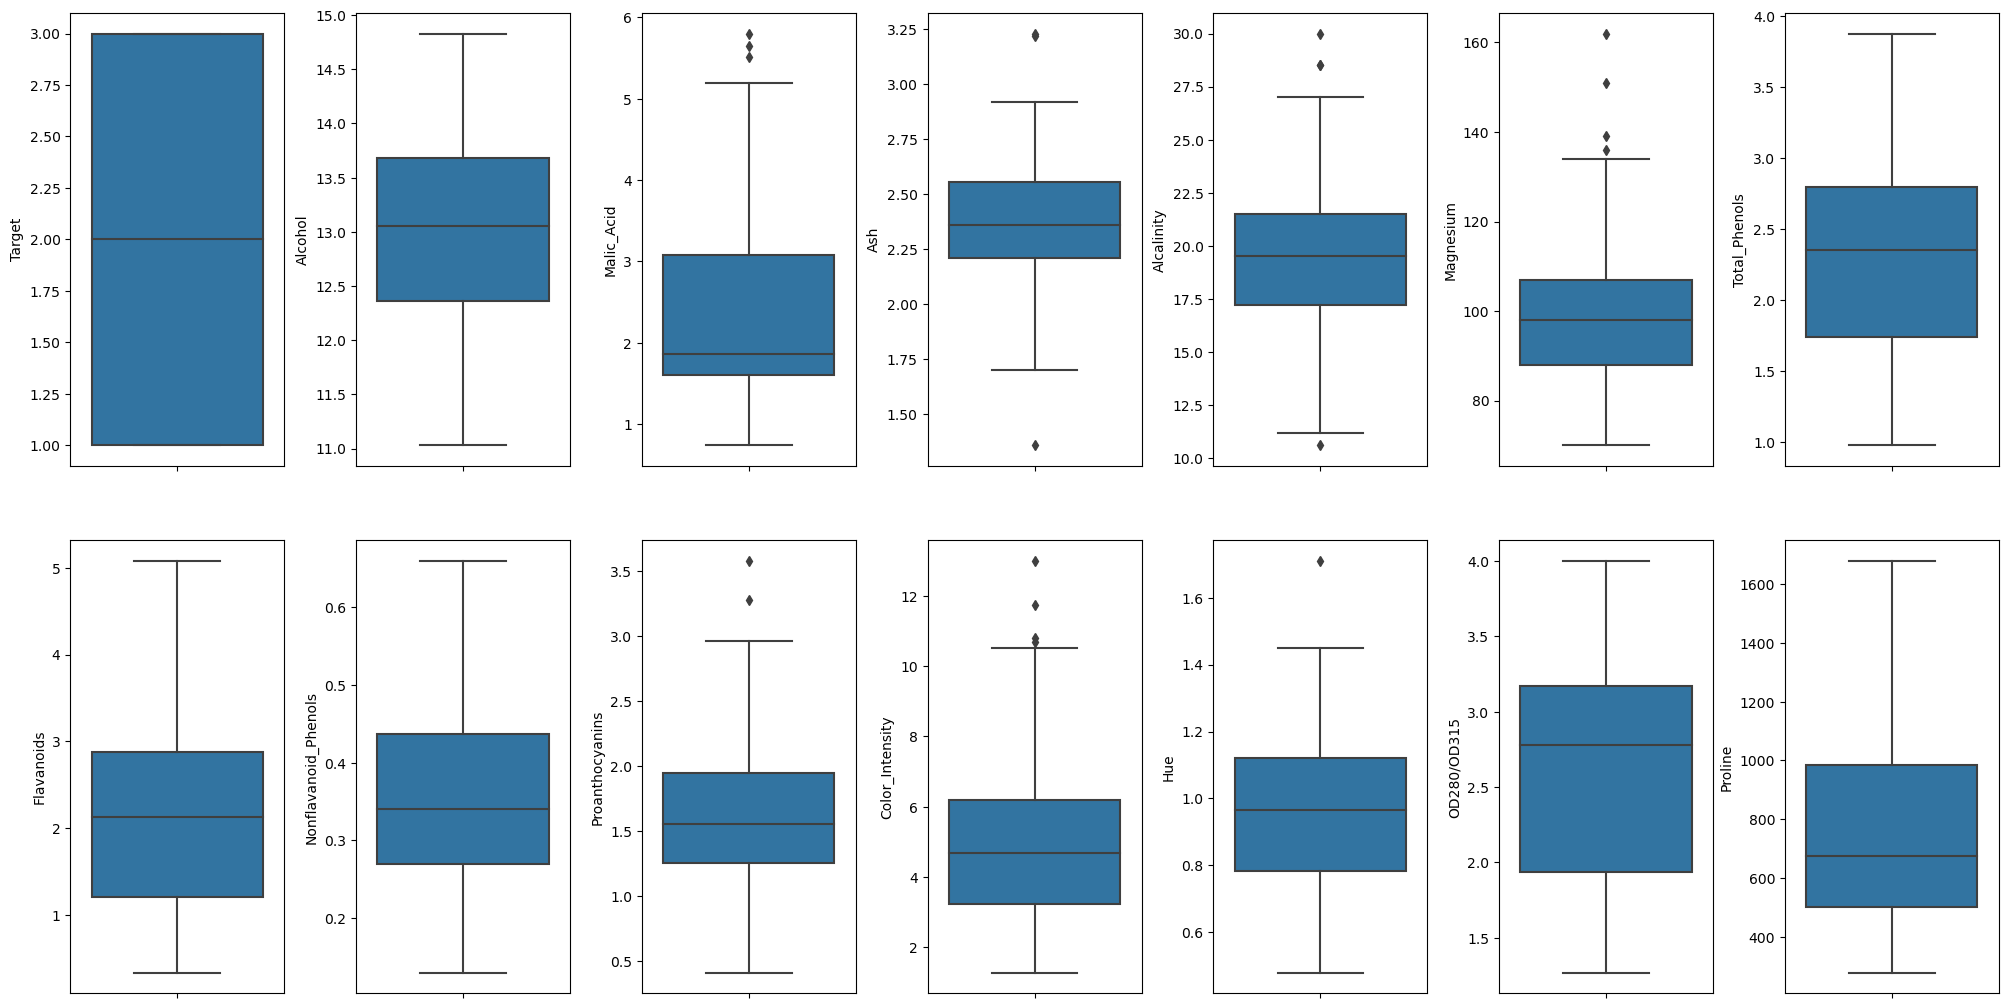

In [190]:
#Gráfico boxplot de distribución de cada variable y detección de outliers

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Wine.items():
    sns.boxplot(y=k, data=Wine, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Ahora que hemos detectado las variables con outliers, aplicamos el proceso de normalización:

In [191]:
Wine.columns

Index(['Target', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

### MinMaxScaler

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler().fit(X_train[['Alcohol','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'OD280/OD315', 'Proline']])
scaler_minmax

MinMaxScaler()

In [193]:
X_train_new=pd.DataFrame()
X_test_new=pd.DataFrame()

In [194]:
X_train_new[['Alcohol','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'OD280/OD315', 'Proline']]=scaler_minmax.transform(X_train
                                                                                     [['Alcohol','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'OD280/OD315', 'Proline']])

In [195]:
X_test_new[['Alcohol','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'OD280/OD315', 'Proline']]=scaler_minmax.transform(X_test
                                                                                     [['Alcohol','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'OD280/OD315', 'Proline']])

In [196]:
X_train_new.head()

,Alcohol,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,OD280/OD315,Proline
0,0.276316,0.213793,0.244726,0.78,0.366300,0.163961
1,0.378947,0.524138,0.407173,0.38,0.498168,0.534903
2,0.747368,0.679310,0.554852,0.48,0.780220,0.517045
3,0.221053,0.648276,0.567511,0.16,0.868132,0.082792
4,0.413158,0.220690,0.067511,1.00,0.113553,0.338474


### Robust

In [197]:
from sklearn.preprocessing import RobustScaler
scaler_robust=RobustScaler().fit(X_train[['Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Proanthocyanins', 'Color_Intensity', 'Hue']])
scaler_robust

RobustScaler()

In [198]:
X_train_new[['Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Proanthocyanins', 'Color_Intensity', 'Hue']]=scaler_robust.transform(X_train[['Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Proanthocyanins', 'Color_Intensity', 'Hue']])


In [199]:
X_test_new[['Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Proanthocyanins', 'Color_Intensity', 'Hue']]=scaler_robust.transform(X_test[['Malic_Acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Proanthocyanins', 'Color_Intensity', 'Hue']])


In [200]:
X_train_new.shape

(124, 13)

In [201]:
X_train_new.describe()

,Alcohol,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,OD280/OD315,Proline,Malic_Acid,Ash,Alcalinity,Magnesium,Proanthocyanins,Color_Intensity,Hue
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.505008,0.433176,0.337791,0.476613,0.477874,0.362504,0.281554,0.063601,0.051398,0.074938,0.119210,0.162621,-0.058065
std,0.207888,0.216570,0.210294,0.240592,0.267852,0.233992,0.670995,0.782232,0.853531,0.822133,0.817721,0.856096,0.638328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597183,-1.801418,-2.213333,-1.661538,-1.453287,-1.155157,-1.135135
25%,0.344079,0.246552,0.141878,0.280000,0.229853,0.180195,-0.197183,-0.382979,-0.466667,-0.553846,-0.432526,-0.529148,-0.621622
50%,0.517105,0.424138,0.343882,0.420000,0.545788,0.314935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653289,0.601724,0.493671,0.600000,0.695971,0.499391,0.802817,0.617021,0.533333,0.446154,0.567474,0.470852,0.378378
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.163380,2.539007,2.400000,4.000000,2.934256,3.049327,1.972973


In [202]:
X_test_new.shape

(54, 13)

In [203]:
X_test_new.describe()

,Alcohol,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,OD280/OD315,Proline,Malic_Acid,Ash,Alcalinity,Magnesium,Proanthocyanins,Color_Intensity,Hue
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.549756,0.500128,0.399086,0.434074,0.522656,0.422138,0.052374,0.148673,-0.122469,0.384046,0.323465,0.286530,-0.067568
std,0.225181,0.208589,0.207374,0.266992,0.240736,0.297663,0.490629,0.773114,0.967691,0.971313,0.717229,0.773411,0.573420
min,0.100000,0.103448,0.027426,0.020000,0.007326,0.027597,-0.687324,-2.765957,-2.373333,-0.800000,-1.439446,-0.914798,-1.351351
25%,0.355921,0.319828,0.202532,0.230000,0.380952,0.196429,-0.233803,-0.177305,-0.820000,-0.476923,-0.152249,-0.408072,-0.324324
50%,0.592105,0.543103,0.430380,0.380000,0.587912,0.340097,-0.115493,0.212766,-0.120000,0.246154,0.422145,0.269058,-0.054054
75%,0.720395,0.675000,0.560654,0.635000,0.706044,0.629667,0.294366,0.624113,0.533333,1.061538,0.771626,0.667265,0.317568
max,0.881579,0.834483,0.757384,1.060000,0.849817,1.137987,1.492958,1.659574,2.800000,3.323077,2.076125,2.600897,0.891892


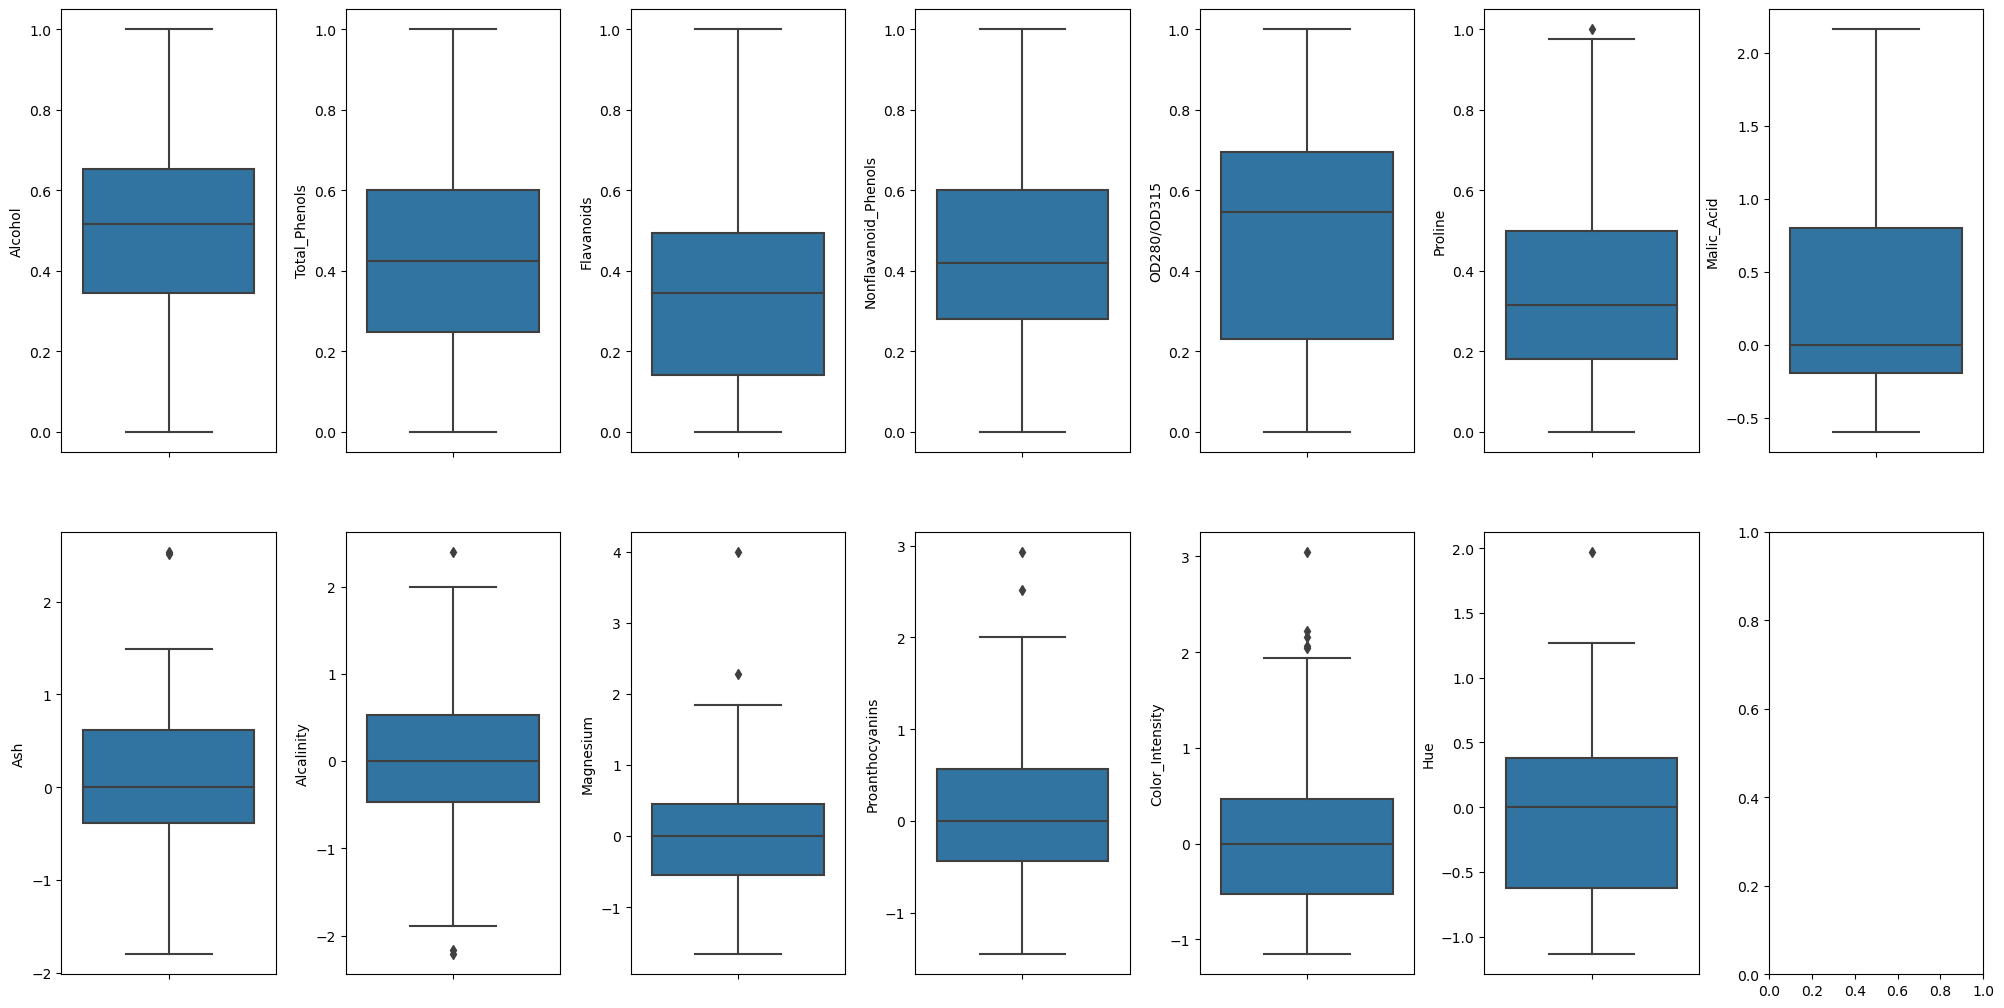

In [204]:
#Gráfico boxplot de distribución de cada variable y detección de outliers

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_train_new.items():
    sns.boxplot(y=k, data=X_train_new, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Modelos

## Decision Tree Classifier

In [205]:
Wine_dtc.fit(X_train_new,y_train)

DecisionTreeClassifier()

In [206]:
y_pred_dtc_pp=Wine_dtc.predict(X_test_new)


In [207]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_dtc_pp))

[[22  1  0]
 [ 0 18  1]
 [ 0  0 12]]


## KNN

In [208]:
Wine_knn.fit(X_train_new,y_train)

KNeighborsClassifier()

In [209]:
y_pred_knn_pp=Wine_knn.predict(X_test_new)
y_pred_knn_pp

array([3, 2, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 1])

In [210]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_knn_pp))

[[23  0  0]
 [ 4 15  0]
 [ 0  1 11]]


## SVM

In [211]:
Wine_svm.fit(X_train_new,y_train)

SVC(kernel='linear')

In [212]:
y_pred_svm_pp=Wine_svm.predict(X_test_new)
y_pred_svm_pp

array([3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

In [213]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test,y_pred_svm_pp))

[[23  0  0]
 [ 1 18  0]
 [ 0  1 11]]


## XGBBoot

In [214]:
Wine_xgb.fit(X_train_new,y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [215]:
y_pred_xgb_pp=Wine_xgb.predict(X_test_new)
y_pred_xgb_pp

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

In [216]:
## Confusion Matrix
print (metrics.confusion_matrix(y_test_xgb,y_pred_xgb_pp))

[[23  0  0]
 [ 2 17  0]
 [ 0  0 12]]


In [217]:
f1_dtc_pp=metrics.f1_score(y_test,y_pred_dtc_pp,average='weighted').round(2)
f1_knn_pp=metrics.f1_score(y_test,y_pred_knn_pp,average='weighted').round(2)
f1_svm_pp=metrics.f1_score(y_test,y_pred_svm_pp,average='weighted').round(2)
f1_xgb_pp=metrics.f1_score(y_test_xgb,y_pred_xgb_pp,average='weighted').round(2)


In [218]:
Results_pp=pd.DataFrame(
{'Decision Tree' : [f1_dtc,f1_dtc_params,f1_dtc_cv,f1_dtc_pp],
'KNN' : [f1_knn,f1_knn_params,f1_knn_cv,f1_knn_pp],
'SVM' :[f1_svm,f1_svm_params,f1_svm_cv,f1_svm_pp],
'XGBoost' :[f1_xgb,f1_xgb_params,f1_xgb_cv,f1_xgb_pp]},
index = ['F1', 'F1_hyperparameters','F1_CV','F1_pp'])
Results_pp

,Decision Tree,KNN,SVM,XGBoost
F1,0.94,0.70,0.96,0.96
F1_hyperparameters,0.96,0.74,0.98,0.96
F1_CV,0.95,0.78,0.98,0.98
F1_pp,0.96,0.91,0.96,0.96


En este caso, hemos aplicado el proceso de normalización, y reentrenado los modelos originales (sin búsqueda de parámetros).
Podemos observar que el modelo KNN mejora sustancialmente.

El modelo KNN utiliza cálculo de distancias basado en el valor de las variables. Si la escala de unas variables difiere mucho de las otras, esta variable dominará la distancia y por lo tanto el resultado del modelo. La normalización de los datos es por lo tanto un proceso necesario previamente a la creación de este modelo.